<a href="https://colab.research.google.com/github/ericyoc/ml_portfolio/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#k-means clustering

import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
def main():

    # INPUT
    # n_samples: The total number of points equally divided among clusters.
    # Value will be: 5000
    # centers: The number of centers to generate, or the fixed center locations.
    # Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
    # cluster_std: The standard deviation of the clusters.
    # Value will be: 0.9

    # OUTPUT
    # X: Array of shape [n_samples, n_features]. (Feature Matrix)
    # The generated samples.
    # y: Array of shape [n_samples]. (Response Vector)
    # The integer labels for cluster membership of each sample.

    # k-Means randomly generated dataset
    np.random.seed(0)

    X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

    # Figure 1: Scatter plot of the generated data points
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], marker='.')
    plt.title('Generated Data Points')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.tight_layout()
    plt.show()

    # setup k-means
    # init: Initialization method of the centroids.
        # Value will be: "k-means++"
        # k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    # n_clusters: The number of clusters to form as well as the number of centroids to generate.
        # Value will be: 4 (since we have 4 centers)
    # n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
        # Value will be: 12

    k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
    k_means.fit(X)
    k_means_labels = k_means.labels_
    k_means_labels
    k_means_cluster_centers = k_means.cluster_centers_
    k_means_cluster_centers

    # Figure 2: Visual plot of the clusters and centroids
    fig = plt.figure(figsize=(6, 4))
    colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
    ax = fig.add_subplot(1, 1, 1)
    for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
        my_members = (k_means_labels == k)
        cluster_center = k_means_cluster_centers[k]
        ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
        ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
    ax.set_title('KMeans Clustering')
    ax.set_xticks(())
    ax.set_yticks(())
    plt.tight_layout()
    plt.show()

    # Figure 3: Clustering the dataset into 3 clusters
    k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
    k_means3.fit(X)
    fig = plt.figure(figsize=(6, 4))
    colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
    ax = fig.add_subplot(1, 1, 1)
    for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
        my_members = (k_means3.labels_ == k)
        cluster_center = k_means3.cluster_centers_[k]
        ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
        ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
    ax.set_title('KMeans Clustering with 3 Clusters')
    ax.set_xticks(())
    ax.set_yticks(())
    plt.tight_layout()
    plt.show()

    # customer segmentation with K-Means

    # load data
    import pandas as pd
    cust_df = pd.read_csv("ml_data/Cust_Segmentation.csv")
    print(cust_df.head())

    # pre processing
    df = cust_df.drop('Address', axis=1)
    print(df.head())

    # normalize over the standard deviation
    from sklearn.preprocessing import StandardScaler
    X = df.values[:,1:]
    X = np.nan_to_num(X)
    Clus_dataSet = StandardScaler().fit_transform(X)
    Clus_dataSet

    # modeling
    clusterNum = 3
    k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
    k_means.fit(X)
    labels = k_means.labels_
    print(labels)

    # gain insights
    df["Clus_km"] = labels
    print(df.head(5))

    df.groupby('Clus_km').mean()

    # Figure 4: Distribution of customers based on age and income
    area = np.pi * (X[:, 1])**2
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
    plt.title('Customer Distribution by Age and Income')
    plt.xlabel('Age', fontsize=18)
    plt.ylabel('Income', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Figure 5: 3D scatter plot of customer segmentation
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 1], X[:, 0], X[:, 3], c=labels.astype(float), cmap='viridis')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 0')
    ax.set_zlabel('Feature 3')
    plt.title('Customer Segmentation')
    cluster_labels = ['Affluent, Educated, and Old Aged',
                      'Middle Aged and Middle Income',
                      'Young and Low Income']
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                                  markerfacecolor=plt.cm.viridis(i/2.0), markersize=8)
                       for i, label in enumerate(cluster_labels)]
    ax.legend(handles=legend_elements, loc='best')
    plt.tight_layout()
    plt.show()

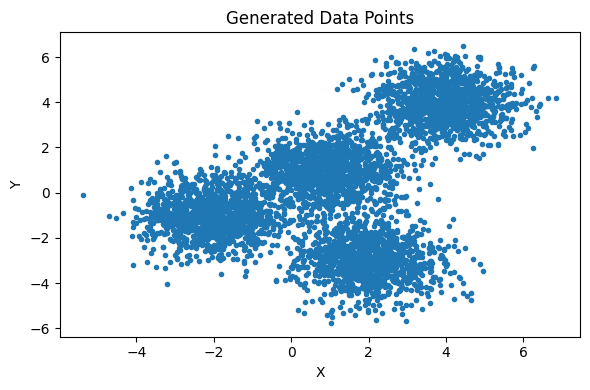

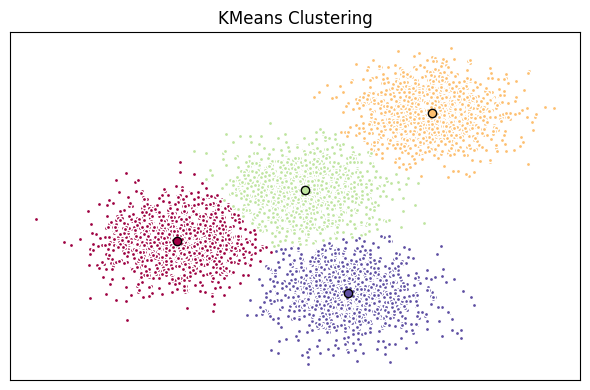

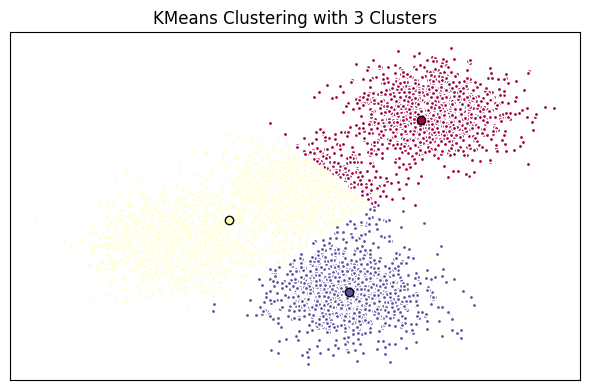

   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  
   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3        

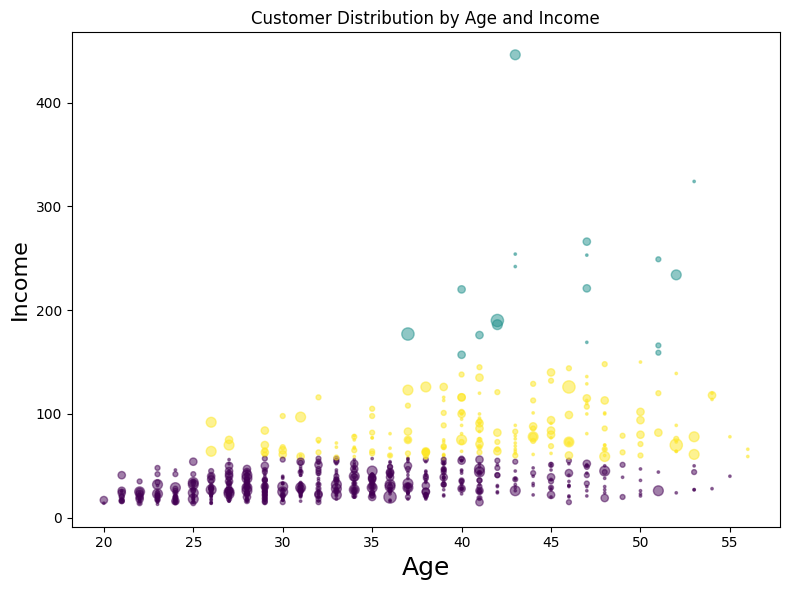

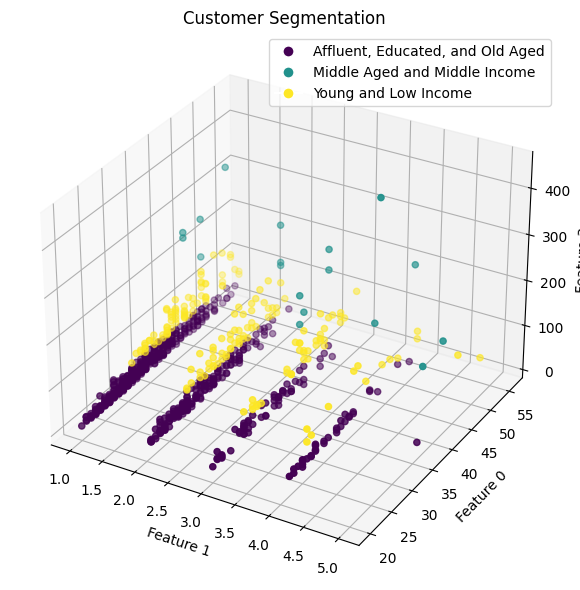

In [4]:
if __name__ == "__main__":
    main()